In [13]:
# import libraries
import pandas as pd
import numpy as np

In [14]:
# import data
url='./Players.csv'
df_iris=pd.read_csv(url)
df_iris.drop('Unnamed: 0',axis=1, inplace=True)
df_iris.head() 

,Player,height,weight,college,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [20]:
df_iris.isna().sum()

Player           1
height           1
weight           1
college        349
born             1
birth_city     470
birth_state    483
dtype: int64

In [3]:
##Cleaning data 

#1. data type, Null values
df_iris.info() 
df_iris= df_iris.dropna()

#2. duplicated data 
print("Total of duplicated value:",df_iris.duplicated().sum()) 

#3. 
df_iris.describe() 

#4. Total of columns, rows
print("Total of columns: ",df_iris.shape[1]) 
print("Total of rows: ",df_iris.shape[0]) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3922 entries, 0 to 3921
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player       3921 non-null   object 
 1   height       3921 non-null   float64
 2   weight       3921 non-null   float64
 3   college      3573 non-null   object 
 4   born         3921 non-null   float64
 5   birth_city   3452 non-null   object 
 6   birth_state  3439 non-null   object 
dtypes: float64(3), object(4)
memory usage: 214.6+ KB
Total of duplicated value: 0
Total of columns:  7
Total of rows:  3189


In [4]:
for x in df_iris.columns :
    print("All unique variables in", x) 
    print(df_iris[x].value_counts()) 
    print("")

All unique variables in Player
Cliff Barker         1
Brandon Williams     1
Peter Aluma          1
Toby Bailey          1
LaMark Baker         1
                    ..
Gene Banks           1
Rolando Blackman     1
Ray Blume            1
Alex Bradley         1
Stephen Zimmerman    1
Name: Player, Length: 3189, dtype: int64

All unique variables in height
201.0    335
203.0    332
206.0    326
196.0    291
198.0    278
190.0    253
193.0    252
208.0    238
188.0    208
211.0    180
185.0    143
213.0    119
183.0     95
180.0     35
216.0     31
178.0     30
218.0     16
175.0      7
224.0      4
221.0      4
170.0      3
226.0      2
173.0      2
231.0      1
168.0      1
160.0      1
229.0      1
165.0      1
Name: height, dtype: int64

All unique variables in weight
86.0     228
95.0     227
83.0     220
99.0     216
97.0     179
        ... 
75.0       1
139.0      1
138.0      1
126.0      1
163.0      1
Name: weight, Length: 71, dtype: int64

All unique variables in college
Unive

In [5]:
#Determine top 10
data=df_iris.groupby(['birth_city'])[['Player']].count().sort_values(by='Player', ascending = False)
data=data.reset_index()
data =data.head(10) 
data

,birth_city,Player
0,Chicago,112
1,Los Angeles,86
2,Philadelphia,82
3,Brooklyn,75
4,New York,71
5,Washington,62
6,Detroit,58
7,Baltimore,37
8,Atlanta,36
9,Dallas,33


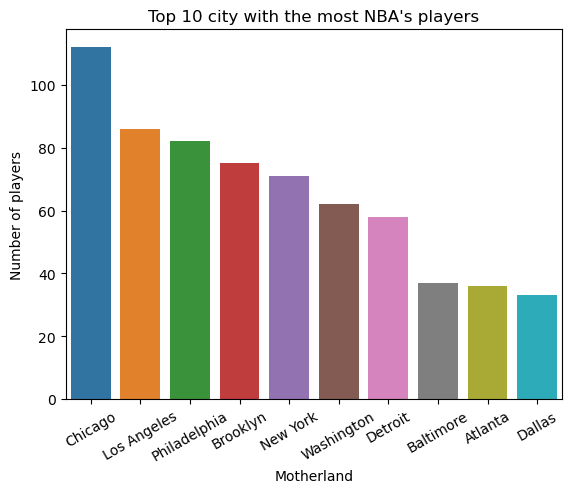

In [6]:
import seaborn as sns 
import matplotlib.pyplot as plt 

bar =sns.barplot(x = data['birth_city'], y = data['Player']) 
bar.set_title("Top 10 city with the most NBA's players")
bar.set_xlabel("Motherland") 
bar.set_ylabel("Number of players")
ax = plt.gca()
for label in ax.get_xticklabels(which = 'major'): 
    label.set(rotation=30)

In [8]:
data=df_iris.groupby(['college'])[['Player']].count().sort_values(by='Player', ascending = False)
data=data.reset_index()
data =data.head(10) 
data

,college,Player
0,University of Kentucky,84
1,"University of California, Los Angeles",84
2,University of North Carolina,65
3,University of Kansas,58
4,Duke University,54
5,University of Notre Dame,43
6,St. John's University,43
7,Michigan State University,43
8,Syracuse University,43
9,Indiana University,42


Text(0.5, 1.0, "Top 10 College with the most NBA's players")

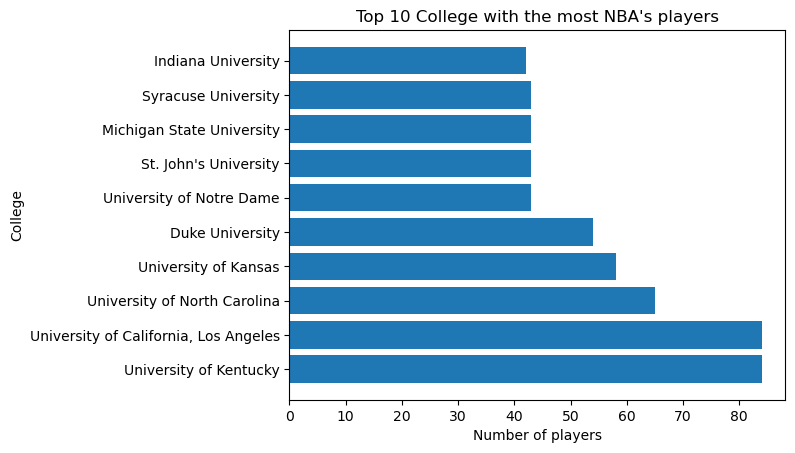

In [9]:
import seaborn as sns 
import matplotlib.pyplot as plt 

plt.barh(y = data['college'], width = data['Player']) 
plt.xlabel('Number of players') 
plt.ylabel('College') 
plt.title("Top 10 College with the most NBA's players")

Text(0.5, 1.0, 'PLayers height in the NBA')

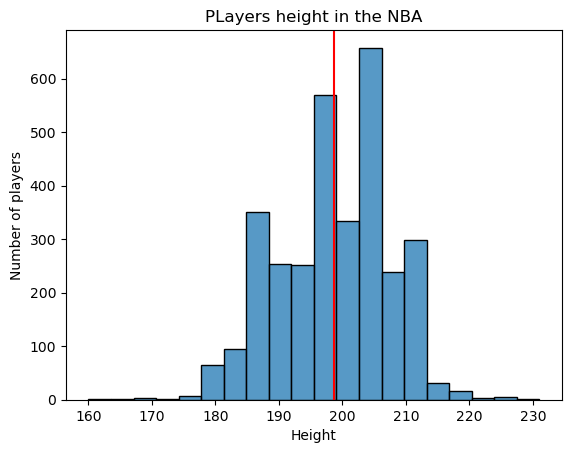

In [12]:
mean = df_iris['height'].mean() 
sns.histplot(x=df_iris['height'], bins=20) 
plt.axvline(mean, color='r')
plt.xlabel('Height') 
plt.ylabel('Number of players') 
plt.title('PLayers height in the NBA')